<a href="https://colab.research.google.com/github/Ariara61/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_497~512.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 05. 감성 분석
**감성 분석 소개**
* 감성 분석: 문서의 주관적인 감성/의견/기분 등을 파악하기 위한 방법
* 문서 내 텍스트가 나타내는 여러 가지 주관적인 단어와 문맥을 기반으로 감성 수치를 계산하는 방법을 이용
* 감성 지수는 긍정 감성 지수와 부정 감성 지수로 구성되며 이들 지수를 합산해 긍정 감성 또는 부정 감성을 결정
* 지도학습: 학습 데이터와 타깃 레이블 값을 기반으로 감성 분석 학습을 수행한 뒤 이를 기반으로 다른 데이터의 감성 분석을 예측하는 방법으로 일반적인 텍스트 기반의 분류와 거의 동일
* 비지도 학습: "Lexicon"이라는 일종의 감성 어휘 사전을 이용. Lexicon은 감성 분석을 위한 용어와 문맥에 대한 다양한 정보를 가지고 있으며, 이를 이용해 문서의 긍정적, 부정적 감성 여부를 판단.

**지도학습 기반 감성 분석 실습 - IMDB 영화평**


In [2]:
import pandas as pd

review_df = pd.read_csv("labeledTrainData.tsv", header = 0, sep = "\t", quoting = 3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


* Feature
 * id: 각 데이터의 id
 * sentiment: 영화평의 Sentiment 결과 값
 * review: 영화평의 텍스트

In [3]:
print(review_df["review"][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

* <br /> 문자열은 피처로 만들 필요가 없으니 삭제
* 판다스의 DataFrame/Series는 문자열 연산을 지원하기 위해 str 속성을 이용. str을 적용하면 다양한 문자열 연산을 수행할 수 있음.
* replace()를 str에 적용해 <br /> 태그를 공백으로 대체
* 영어가 아닌 숫자/특수문자 역시 Sentiment를 위한 피처로는 별 의미가 없어 보이므로 모두 공란으로 변경
* 숫자/특수문자를 찾고 이를 변환하는 것은 정규 표현식을 이용
* 파이썬의 re 모듈은 편리하게 정규 표현식을 지원
* 정규 표현식 [^a-zA-Z]의 의미는 영어 대/소문자가 아닌 모든 문자를 찾는 것
* re.sum("[^a-zA-Z]", " ", x)는 영어 대/소문자가 아닌 모든 문자를 찾아서 공란으로 변경

In [4]:
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df["review"] = review_df["review"].str.replace("<br \>", " ")

# 파이썬의 정규 표현식 모듈인 re를 이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df["review"] = review_df["review"].apply(lambda x : re.sub("[^a-zA-Z]", " ", x))

<ipython-input-4-762f79139cd9>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  review_df["review"] = review_df["review"].str.replace("<br \>", " ")


* 결정 값 클래스인 sentiment 칼럼을 별도로 추출해 결정 값 데이터 세트를 만들고, 원본 데이터 세트에서 id와 sentiment 칼럼을 삭제해 피처 데이트 세트를 생성
* train_test_split()을 이용해 학습용과 테스트용 데이터 세트로 분리

In [5]:
from sklearn.model_selection import train_test_split

class_df = review_df["sentiment"]
feature_df = review_df.drop(["id", "sentiment"], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size = 0.3,
                                                    random_state = 156)
X_train.shape, X_test.shape

((17500, 1), (7500, 1))

* 감상평 텍스트를 피처 벡터화한 후에 ML 분류 알고리즘을 적용해 예측 성능을 측정
* Count 벡터화를 적용해 예측 성능을 측정하고, TF-IDF 벡터화를 적용
* Logistic Regression을 이용
* 예측 성능 평가는 이진 분류임을 고려해 테스트 데이터 세트의 정확도와 ROC_AUC를 모두 측정

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱 워드는 English, filtering, ngram은 (1, 2)로 설정해 CountVectorization 수행.
# LogisticRegression의 C는 10으로 설정.
pipeline = Pipeline([
    ("cnt_vect", CountVectorizer(stop_words = "english", ngram_range = (1, 2))),
    ("lr_clf", LogisticRegression(C = 10))
])

# Pipeline 객체를 이용해 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc 때문에 수행.
pipeline.fit(X_train["review"], y_train)
pred = pipeline.predict(X_test["review"])
pred_probs = pipeline.predict_proba(X_test["review"])[:, 1]

print("예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}".format(accuracy_score(y_test, pred),
                                                 roc_auc_score(y_test, pred_probs)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


예측 정확도는 0.8865, ROC-AUC는 0.9506


* TF-IDF 벡터화를 적용해 다시 예측 성능을 측정

In [7]:
# 스톱 워드는 english, filtering, ngram은 (1, 2)로 설정해 TF-IDF 벡터화 수행.
# LogisticRegression의 C는 10으로 설정.
pipeline = Pipeline([
    ("tfidf_vect", TfidfVectorizer(stop_words = "english", ngram_range = (1, 2))),
    ("lr_clf", LogisticRegression(C = 10))
])

pipeline.fit(X_train["review"], y_train)
pred = pipeline.predict(X_test["review"])
pred_probs = pipeline.predict_proba(X_test["review"])[:, 1]

print("예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}".format(accuracy_score(y_test, pred),
                                                 roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8932, ROC-AUC는 0.9600


* TF-IDF 기반 피처 벡터화의 예측 성능이 조금 더 나아짐

**비지도학습 기반 감성 분석 소개**
* 비지도 감성 분석은 Lexicon을 기반으로 함
* 많은 감성 분석용 데이터는 결정된 레이블 값을 가지고 있지 않음. 이러한 경우 Lexicon을 유용하게 사용.
* Lexicon은 일반적으로 어휘집을 의미하지만, 여기서는 주로 감성만을 분석하기 위해 지원하는 감성 어휘 사전.
* 감성 사전은 긍정 감성 또는 부정 감성의 정도를 의미하는 수치를 가지고 있으며 이를 감정 지수라고 함.감성 지수는 단어의 위치나 주변 단어, 문맥, POS 등을 참고해 결정됨.
* NLTK 패키지가 감성 사전을 구현함. NLTK는 많은 서브 모듈을 가지고 있으며 그중에 감성 사전인 Lexicon 모듈도 포함되어 있음.
*  WordNet: NLP에서 제공하는 방대한 영어 어휘 사전.
* 시맨틱(semantic): "문맥상 의미". 언어학에서 시맨틱을 표현하기 위해서 여러 가지 규칙을 정해왔으며, NLP 패키지는 시맨틱 프로그램적으로 인터페이스 할 수 있는 다양한 방법을 제공
* WordNet은 다양한 상황에서 같은 어휘라도 다르게 사용되는 어휘의 시맨틱 정보를 제공하며, 이를 위해 각각의 품사로 구성된 개별 단어를 Synset이라는 개념을 이용해 표현.
* Synset: 단순한 하나의 단어가 아니라 그 단어가 가지는 문맥, 시맨틱 정보를 제공하는 WordNet의 핵심 개념
* NLTK의 감성 사전은 감성에 대한 훌륭한 사전 역할을 제공하지만, 예측 성능은 그리 좋지 못함. 그 때문에 실제 업무의 적용은 NLTK 패키지가 아닌 다른 감성 사전을 적용하는 것이 일반적.
* 대표적인 감성 사전
 * SentiWordNet: WordNet의 확장 버전으로, 단어의 긍정성, 부정성, 객관성 점수를 제공
 * VADER: 텍스트에 나타나는 감정을 평가하기 위한 규칙 기반 도구
 * Pattern: 웹 마이닝을 위한 파이썬 라이브러리

**SentiWordNet을 이용한 감성 분석**

<WordNet Synset과 SentiwordNet SentiSynset 클래스의 이해>
* WordNet을 이용하기 위해서는 NLTK를 셋업한 후에 WordNet 서브패키지와 데이터 세트를 내려받아야 함.

In [8]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

* WordNet 모듈을 임포트해서 "present" 단어에 대한 Synset을 추출

In [9]:
from nltk.corpus import wordnet as wn

term = "present"

# "present"라는 단어로 wordnet의 synsets 생성.
synsets = wn.synsets(term)
print("synsets() 변환 type: ", type(synsets))
print("synsets() 변환 값 계수: ", len(synsets))
print("synsets() 변환 값: ", synsets)

synsets() 변환 type:  <class 'list'>
synsets() 변환 값 계수:  18
synsets() 변환 값:  [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


* synsets() 호출 시 변환되는 것은 여러 개의 Synset 객체를 가지는 리스트.
* Synset 객체의 파라미터 present.n.01은 POS 태그를 나타냄
* present.n.01에서 present는 의미, n은 명사 품사, 01은 present가 명사로서 가지는 의미가 여러 가지 있어서 이를 구분하는 인덱스

In [10]:
for synset in synsets:
  print("#### Synset name: ", synset.name(), "####")
  print("POS: ", synset.lexname())
  print("Definition: ", synset.definition())
  print("Lemmas: ", synset.lemma_names())

#### Synset name:  present.n.01 ####
POS:  noun.time
Definition:  the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas:  ['present', 'nowadays']
#### Synset name:  present.n.02 ####
POS:  noun.possession
Definition:  something presented as a gift
Lemmas:  ['present']
#### Synset name:  present.n.03 ####
POS:  noun.communication
Definition:  a verb tense that expresses actions or states at the time of speaking
Lemmas:  ['present', 'present_tense']
#### Synset name:  show.v.01 ####
POS:  verb.perception
Definition:  give an exhibition of to an interested audience
Lemmas:  ['show', 'demo', 'exhibit', 'present', 'demonstrate']
#### Synset name:  present.v.02 ####
POS:  verb.communication
Definition:  bring forward and present to the mind
Lemmas:  ['present', 'represent', 'lay_out']
#### Synset name:  stage.v.01 ####
POS:  verb.creation
Definition:  perform (a play), especially on a stage
Lemmas:  ['stage', 'present', 'represent']
##

* Synset("present.n.01"): POS가 noun.time이며 "시간적인 의미로 현재"
* Synset("present.n.02"): POS가 noun.possession이며 "선물"
* Synset("show.v.01"): POS가 verb.perception이며 "관객에게 전시물 등을 보여주다"
* synset은 하나의 단어가 가질 수 있는 여러 시맨틱 정보를 개별 클래스로 나타냄

* synset 객체는 단어 간의 유사도를 나타내기 위해서 path_similarity() 메서드를 제공

In [13]:
# synset 객체를 단어별로 생성합니다.
tree = wn.synset("tree.n.01")
lion = wn.synset("lion.n.01")
tiger = wn.synset("tiger.n.02")
cat = wn.synset("cat.n.01")
dog = wn.synset("dog.n.01")

entities = [tree, lion, tiger, cat, dog]
similarities = []
entity_names = [entity.name().split(".")[0] for entity in entities]

# 단어별 synset을 반복하면서 다른 단어의 synset과 유사도를 측정합니다.
for entity in entities:
  similarity = [round(entity.path_similarity(compared_entity), 2)
  for compared_entity in entities]
  similarities.append(similarity)

# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame 형태로 저장합니다.
simiarity_df = pd.DataFrame(similarities, columns = entity_names, index = entity_names)
simiarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


* SentiWordNet은 WordNet과 유사한 Senti_Synset 클래스를 가지고 있음.

In [15]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets("slow"))
print("senti_synsets() 반환 type: ", type(senti_synsets))
print("senti_synsets() 반환 값 개수: ", len(senti_synsets))
print("senti_synsets() 반환 값: ", senti_synsets)

senti_synsets() 반환 type:  <class 'list'>
senti_synsets() 반환 값 개수:  11
senti_synsets() 반환 값:  [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


* SentiSynset 객체는 단어의 감성을 나타내는 감성 지수와 객관성을 나타내는 객관성 지수를 가지고 있음.
* 감성 지수는 다시 긍정 지수와 부정 지수로 나뉨.
* 어떤 단어가 전혀 감성적이지 않으면 객관성 지수는 1, 감성 지수는 0.

In [16]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset("father.n.01")
print("father 긍정감성 지수: ", father.pos_score())
print("father 부정감성 지수: ", father.neg_score())
print("father 객관성 지수: ", father.obj_score())
print("\n")
fabulous = swn.senti_synset("fabulous.a.01")
print("fabulous 긍정감성 지수: ", fabulous.pos_score())
print("fabulous 부정감성 지수: ", fabulous.neg_score())

father 긍정감성 지수:  0.0
father 부정감성 지수:  0.0
father 객관성 지수:  1.0


fabulous 긍정감성 지수:  0.875
fabulous 부정감성 지수:  0.125


<SentiWordNet을 이용한 영화 감상평 감성 분석>

* SentiWordNet을 이용해 감성 분석을 수행하는 개략적인 순서
1. 문서를 문장 단위로 분해
2. 다시 문장을 단어 단위로 토큰화하고 품사 태깅
3. 품사 태깅된 단어 기반으로 synset 객체와 senti_synset 객체를 생성
4. Senti_synset에서 긍정 감성/부정 감성 지수를 구하고 이를 모두 합산해 특정 임계치 값 이상일 때 긍정 감성으로, 그렇지 않을 때는 부정 감성으로 결정

In [17]:
# 품사 태깅을 수행하는 내부 함수
from nltk.corpus import wordnet as wn

# 간단한 NLTK PennTreebank Tag를 기반으로 WordNet 기반의 품사 Tag로 변환
def penn_to_wn(tag):
  if tag.startswith("J"):
    return wn.ADJ
  elif tag.startswith("N"):
    return wn.NOUN
  elif tag.startswith("R"):
    return wn.ADV
  elif tag.startswith("V"):
    return wn.VERB

* 문서를 문장 → 단어 토큰 → 품사 태깅 후에 SentiSynset 클래스를 생성하고 Polarity Score을 합산하는 함수를 생성
* 각 단어에 긍정 감성 지수와 부정 감성 지수를 모두 합한 총 감성 지수가 0일 경우 긍정 감성, 그렇지 않으면 부정 감성으로 예측

In [26]:
def swn_polarity(text):
    # 감성 지수 초기화
    sentiment = 0.0
    tokens_count = 0

    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 → 품사 태깅 후에 SentiSynset 생성 → 감성 지수 합산
    for raw_sentence in raw_sentences:
        # NLTK 기반의 품사 태깅 문장 추출
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word, tag in tagged_sentence:

            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score()-swn_synset.neg_score())
            tokens_count += 1

    if not tokens_count:
        return 0

    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0:
        return 1

    return 0

* swn_polarity(text) 함수를 IMDB 감상평의 개별 문서에 적용해 긍정 및 부정 감성을 예측

In [27]:
review_df["preds"] = review_df["review"].apply(lambda x: swn_polarity(x))
y_target = review_df["sentiment"].values
preds = review_df["preds"].values

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix(y_target, preds))
print("정확도: ", np.round(accuracy_score(y_target, preds), 4))
print("정밀도: ", np.round(precision_score(y_target, preds), 4))
print("재현율: ", np.round(recall_score(y_target, preds), 4))

[[7669 4831]
 [3644 8856]]
정확도:  0.661
정밀도:  0.647
재현율:  0.7085


**VADER를 이용한 감성 분석**
* VADER: 소셜 미디어의 감성 분석 용도로 만들어진 룰 기반의 Lexicon
* SentimentIntensityAnalyzer 클래스를 이용해 쉽게 감성 분석을 제공

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df["review"][0])
print(senti_scores)

{'neg': 0.127, 'neu': 0.747, 'pos': 0.125, 'compound': -0.7943}


* SentimentIntensityAnalyzer 객체를 생성한 뒤에 문서별로 polarity_scores() 메서드를 호출해 감성 점수를 구한 뒤, 해당 문서의 감성 점수가 특정 임계값 이상이면 긍정, 그렇지 않으면 부정으로 판단.
* "neg"는 부저 감성 지수, "neu"는 중립적인 감성 지수, "pos"는 긍정적인 감성 지수, 그리고 compound는 neg, neu, pos score을 적절히 조합해 -1에서 1 사이의 감성 지수를 표현한 값
* vader_polarity(): 입력 파라미터로 영화 감상평 텍스트와 긍정/부정을 결정하는 임곗값을 가지고, SentimentIntensityAnalyzer 객체의 polarity_scores() 메서드를 호출해 감성 결과를 반환

In [31]:
def vader_polarity(review, threshold = 0.1):
  analyzer = SentimentIntensityAnalyzer()
  scores = analyzer.polarity_scores(review)

  # compound 값에 기반해 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환
  agg_score = scores["compound"]
  final_sentiment = 1 if agg_score >= threshold else 0
  return final_sentiment

# apply lambda 식을 이용해 레코드별로 vader_polarity()를 수행하고 결과를 "vader_preds"에 저장
review_df["vader_preds"] = review_df["review"].apply(lambda x: vader_polarity(x, 0.1))
y_target = review_df["sentiment"].values
vader_preds = review_df["vader_preds"].values

print(confusion_matrix(y_target, vader_preds))
print("정확도: ", np.round(accuracy_score(y_target, vader_preds), 4))
print("정밀도: ", np.round(precision_score(y_target, vader_preds), 4))
print("재현율: ", np.round(recall_score(y_target, vader_preds), 4))

[[ 6749  5751]
 [ 1856 10644]]
정확도:  0.6957
정밀도:  0.6492
재현율:  0.8515


* 정확도가 SentiWordNet보다 향상됐고, 특히 재현율은 약 85.06%로 매우 크게 향상됨
* 이외에도 뛰어난 감성 사전으로 patter 패키지가 있음

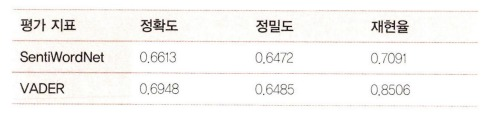

* 감성 사전을 이용한 감성 분석 예측 성능은 지도학습 분류 기반의 예측 성능에 비해 아직은 낮은 수준이지만 결정 클래스 값이 없는 상황을 고려한다면 예측 성능에 일정 수준 만족할 수 있음.